<a href="https://colab.research.google.com/github/BrunoSlamek/Data_Science/blob/master/Simple_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import *
from plotly.subplots import make_subplots
from pandas_profiling import *

In [103]:
# Read data file csv
df = pd.read_csv('/content/netflix_titles.csv')

In [104]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [105]:
# Data investigation
def data_inv(df):
    print(f'Netflix Movies and Shows: {df.shape[0]}')
    print(f'Database Variables: {df.shape[1]}')
    print('-' * 30)
    print('Dataset Columns: \n')
    print(df.columns)
    print('-' * 30)
    print('Datatype of Each Column: \n')
    print(df.dtypes)
    print('-' * 30)
    print('Missing Rows in Each Column: \n')
    c=df.isnull().sum()
    print(c[c > 0])
data_inv(df)

Netflix Movies and Shows: 6234
Database Variables: 12
------------------------------
Dataset Columns: 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
------------------------------
Datatype of Each Column: 

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
------------------------------
Missing Rows in Each Column: 

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64


In [106]:
# changing column data type
df['date_added'] = pd.to_datetime(df['date_added'])

In [107]:
df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [108]:
# Data comparison
df.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [109]:
# Getting the percentage
movie_cent = len(df[df.type == 'Movie'])
tv_show_cent = len(df[df.type == 'TV Show'])

print('Percentage of Movies: {:.1f}%'.format((movie_cent / len(df.type)) * 100))
print('Percentage of TV Shows: {:.1f}%'.format((tv_show_cent / len(df.type)) * 100))

Percentage of Movies: 68.4%
Percentage of TV Shows: 31.6%


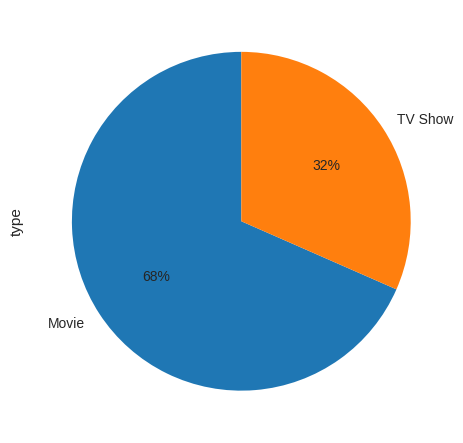

In [110]:
# Percentage graph
df.type.value_counts().plot(kind='pie', autopct='%1.f%%', startangle=90)
plt.show()

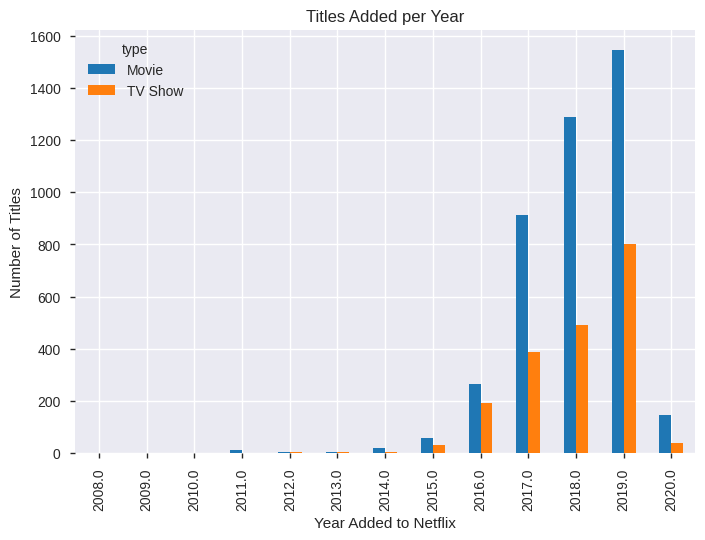

In [111]:
# titles added per year
pd.crosstab(df.date_added.dt.year, df.type).plot(kind = 'bar')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles')
plt.title('Titles Added per Year')
plt.show()

In [112]:
# Some of the oldest Netflix movies
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


In [113]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [114]:
# Top Actors on Netflix with Most Movies

"""
Function to return the main actors of netflix films by country
"""

def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()